# Note méthodologique et conclusion 

Les fonctions python pour l'EDA proviennent de github et sontstockées dans la librairie eda_kernel.py


Process EDA :
- Import table et enregistrement caractéristique
- Valeurs Nan
- Exploration avec valeur target
- Analyste univariée
- Analyste multivariée
- Analyse des variables categorielle ( diagrammes à barres et des diagrammes circulaires)
- Analyse des variables numérique (Box-Plots, des Probability Density Function et Cumulative Density Function/ Violin-Plots

 Bilan :
- les données d'entraînement et de test ont une distribution assez similaire
- beaucoup de valeur manquante sur l'ensemble des datasets (données non saisie etc) 
- la distribution de la variable cible est clairement déséquilibrée (=>choisir les algo adéquates)
- 8% des prêts qui ont été mis en défaut, les défaillants constituent la classe minoritaire
- les défaillants ont une variable cible de 1 et les non-défaillants une variable cible de 0
- On peut voir que la plupart des prêts que les clients prennent sont des prêts cash
- il y a plus de candidats féminins (65,8 %) que de candidats masculins (34,2 %) et les candidats masculins ont tendance à être plus défaillants 10% que les candidates féminines 7%
- les ensembles d'entraînement (train set) et de test (test set) ont une distribution assez similaire
- quelques variables corrélées, qui ne feraient qu'augmenter la dimensionnalité des données, et n'ajouteraient pas beaucoup de valeur. Nous voudrions supprimer ces variables
- la précision ne sera pas la bonne mesure, car elle est généralement biaisée en faveur de la classe majoritaire. Nous pouvons utiliser d'autres métriques telles que le score ROC-AUC, la fonction cout, le score F1, la matrice de confusion pour une meilleure évaluation du modèle

In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import eda_kernel

In [2]:
pd.options.display.max_rows = 999

In [3]:
path1="data/"
data_files=list(os.listdir(path1))
df_files=pd.DataFrame(data_files,columns=['File_Name'])
df_files['Size_in_MB']=df_files.File_Name.apply(lambda x:round(os.stat(path1+x).st_size/(1024*1024),2))
df_files

,File_Name,Size_in_MB
0,application_test.csv,25.34
1,application_train.csv,158.44
2,bureau.csv,162.14
3,bureau_balance.csv,358.19
4,credit_card_balance.csv,404.91
5,grid_search_trials_1000.csv,0.27
6,HomeCredit_columns_description.csv,0.04
7,installments_payments.csv,689.62
8,POS_CASH_balance.csv,374.51
9,previous_application.csv,386.21


In [4]:
df1 = pd.read_csv('data/application_train.csv')
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2 = pd.read_csv('data/application_test.csv')
df2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


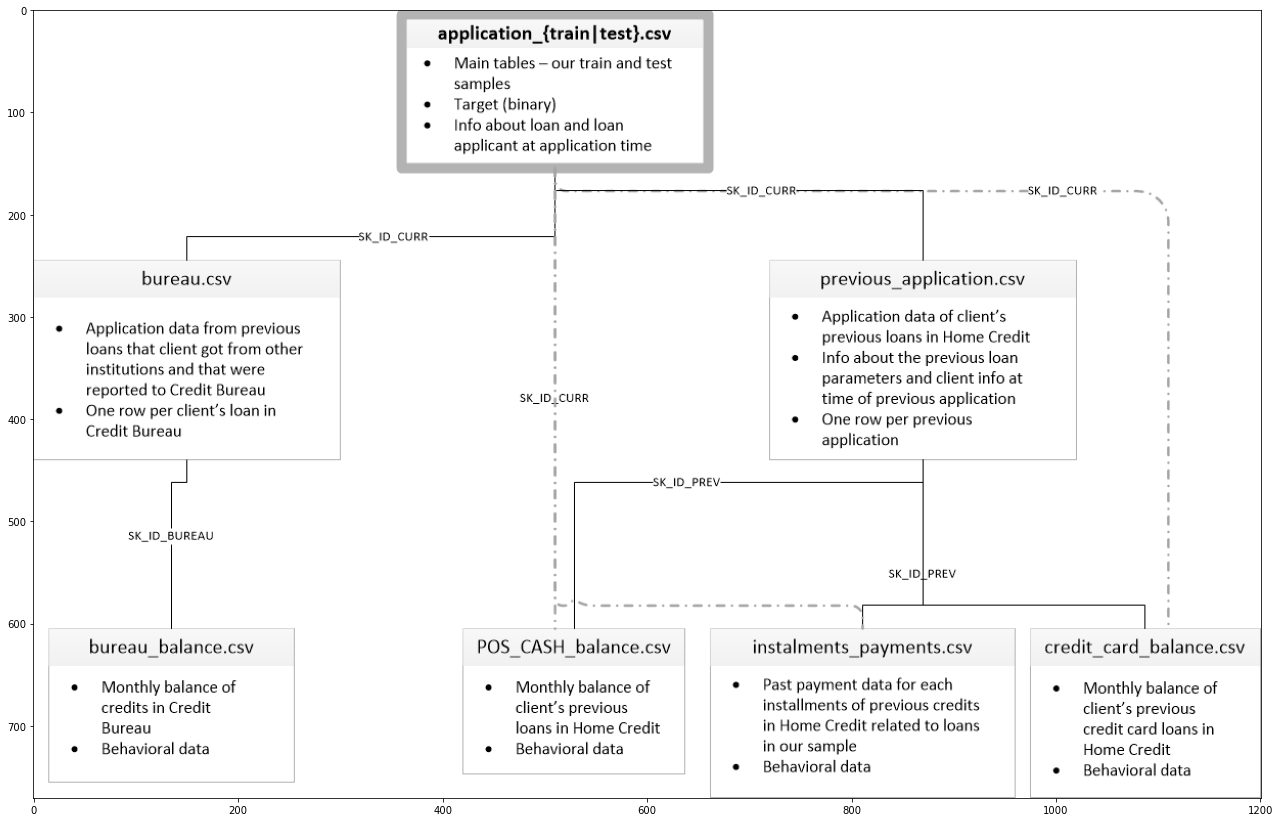

In [6]:
img = cv2.imread("home_credit.png")
plt.figure(figsize=(22, 22))
plt.imshow(img)

## https://medium.com/thecyphy/home-credit-default-risk-part-1-3bfe3c7ddd7a
## https://www.kaggle.com/c/home-credit-default-risk/data

In [7]:
application_train, application_test, bureau, bureau_balance, credit_card_balance, \
    installments_payments, POS_CASH_balance, previous_application, \
    HomeCredit_columns_description = \
    eda_kernel.load_all_tables(path1)

Loading all the tables
Loaded 1 table.
Loaded 2 table.
Loaded 3 table.
Loaded 4 table.
Loaded 5 table.
Loaded 6 table.
Loaded 7 table.
Loaded 8 table.
Loaded 9 table.
Done.
Time Taken to load 9 tables 0:00:21.437889 secondes


# Description des datasets

In [8]:
df_var_appli_train = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'application_{train|test}.csv']
df_var_appli_train.style.hide_index()

C:\Users\tropical noise\AppData\Local\Temp\ipykernel_14180\55807297.py:4: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Table,Row,Description,Special
application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,nan
application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",nan
application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,nan
application_{train|test}.csv,CODE_GENDER,Gender of the client,nan
application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,nan
application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,nan
application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,nan
application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,nan
application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,nan
application_{train|test}.csv,AMT_ANNUITY,Loan annuity,nan


In [9]:
eda_kernel.afficher_stats_basic(application_train)

-------------------------------------------------------------------------------
les données contiennent 307511 lignes et 122 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
eda_kernel.afficher_stats_basic(application_test)

-------------------------------------------------------------------------------
les données contiennent 48744 lignes et 121 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
eda_kernel.afficher_stats_basic(bureau)

-------------------------------------------------------------------------------
les données contiennent 1716428 lignes et 17 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [12]:
eda_kernel.afficher_stats_basic(bureau_balance)

-------------------------------------------------------------------------------
les données contiennent 27299925 lignes et 3 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [13]:
eda_kernel.afficher_stats_basic(credit_card_balance)

-------------------------------------------------------------------------------
les données contiennent 3840312 lignes et 23 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [14]:
eda_kernel.afficher_stats_basic(installments_payments)

-------------------------------------------------------------------------------
les données contiennent 13605401 lignes et 8 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [15]:
eda_kernel.afficher_stats_basic(POS_CASH_balance)

-------------------------------------------------------------------------------
les données contiennent 10001358 lignes et 8 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [16]:
eda_kernel.afficher_stats_basic(previous_application)

-------------------------------------------------------------------------------
les données contiennent 1670214 lignes et 37 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
eda_kernel.afficher_stats_basic(HomeCredit_columns_description)

-------------------------------------------------------------------------------
les données contiennent 219 lignes et 4 variables
-------------------------------------------------------------------------------
nombre de valeur dupliquée dans dataframe : 0
-------------------------------------------------------------------------------


,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


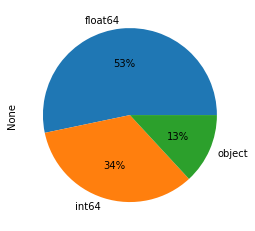

In [18]:
application_train.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

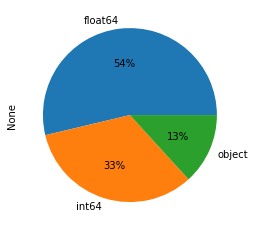

In [19]:
application_test.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

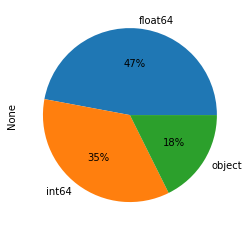

In [20]:
bureau.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

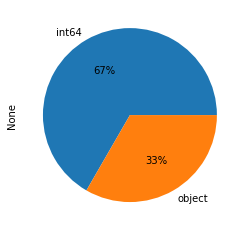

In [21]:
bureau_balance.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

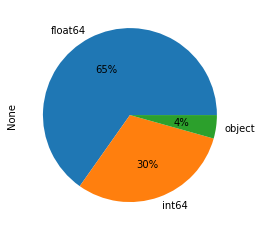

In [22]:
credit_card_balance.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

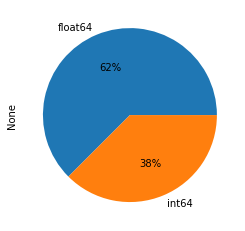

In [23]:
installments_payments.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

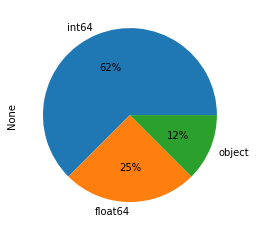

In [24]:
POS_CASH_balance.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

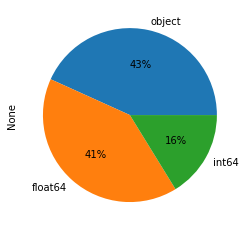

In [25]:
previous_application.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

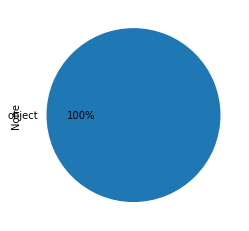

In [26]:
HomeCredit_columns_description.dtypes.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [27]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


nombre de variable avec valeurs manquantes  67


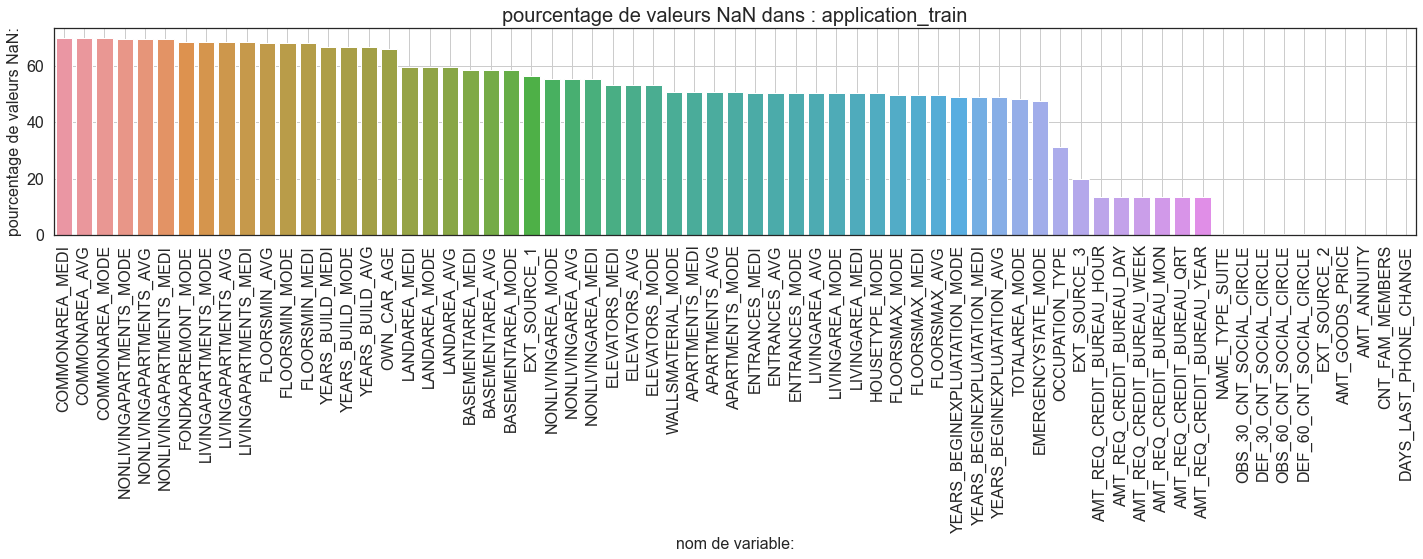

In [28]:
df_nan = eda_kernel.nan_df_create(application_train)
eda_kernel.plot_nan_percent(df_nan, 'application_train', grid=True)

<AxesSubplot:>

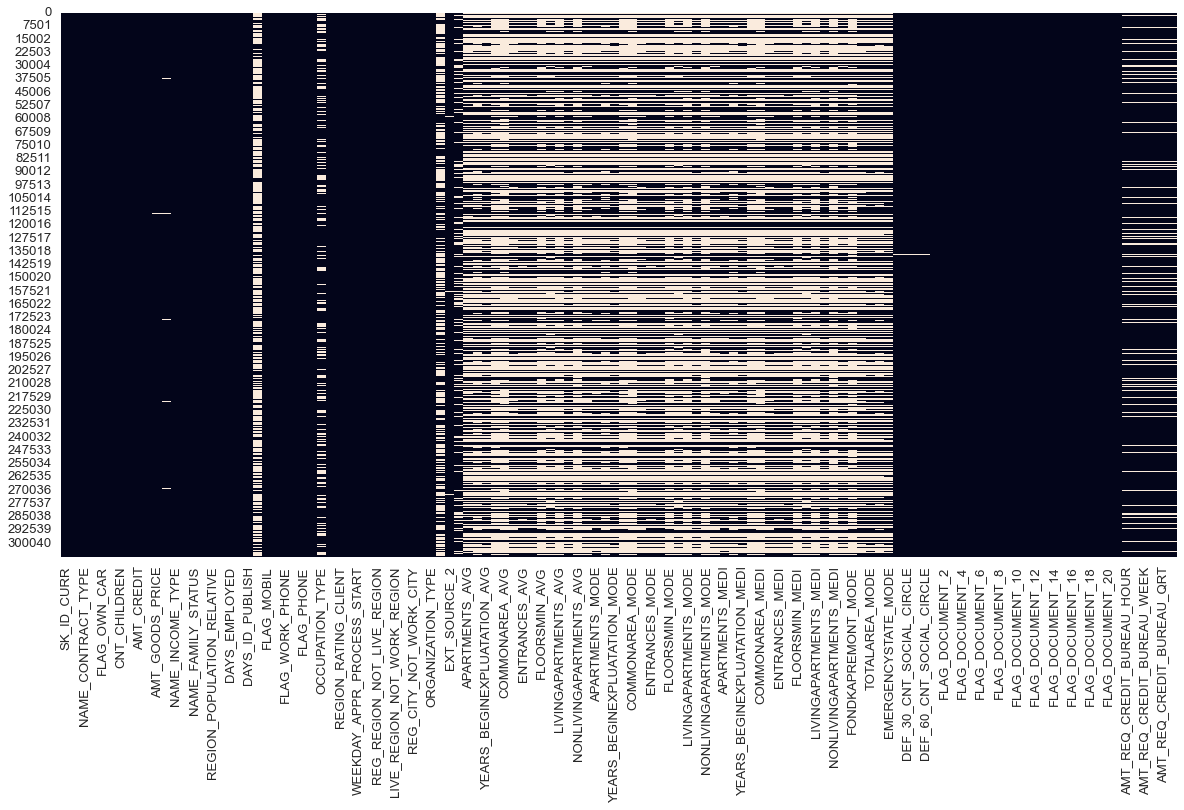

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(application_train.isna(), cbar=False)

nombre de variable avec valeurs manquantes  64


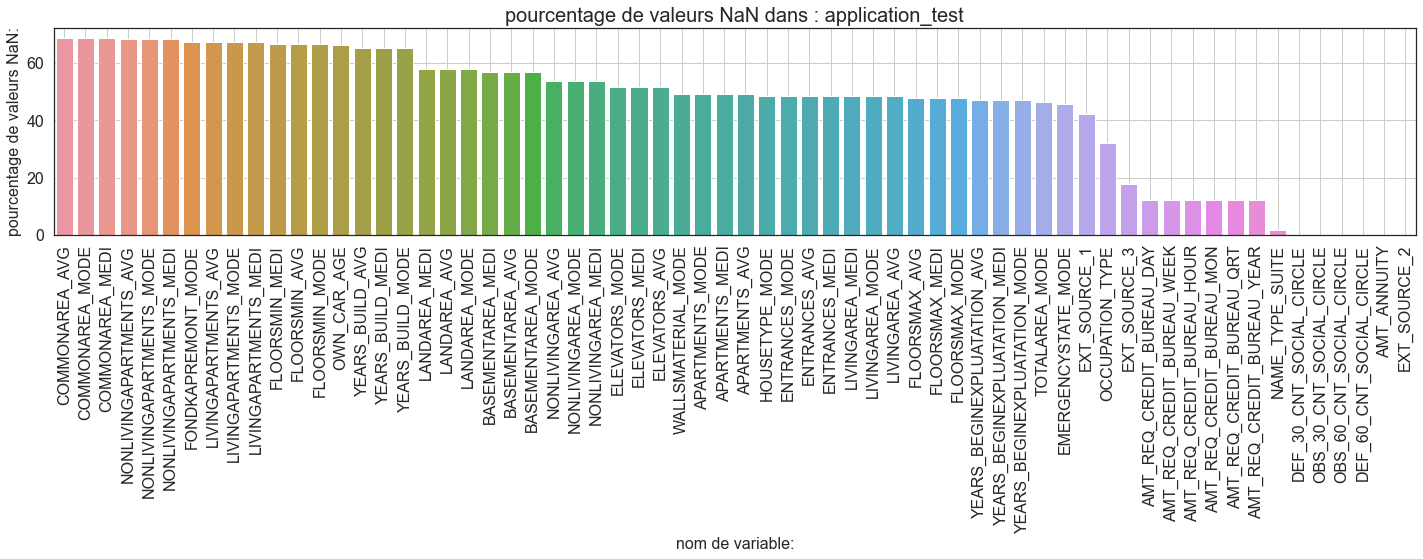

In [30]:
df_nan = eda_kernel.nan_df_create(application_test)
eda_kernel.plot_nan_percent(df_nan, 'application_test', grid=True)

<AxesSubplot:>

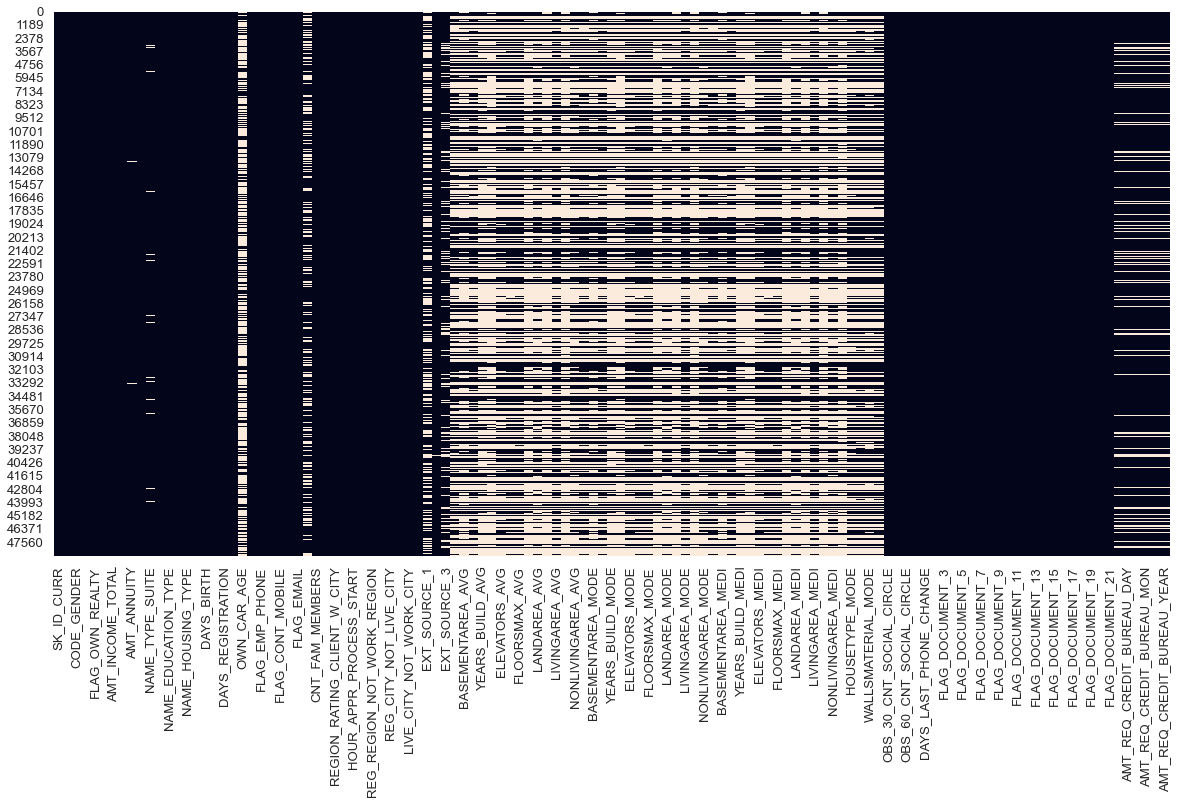

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(application_test.isna(), cbar=False)

nombre de variable avec valeurs manquantes  7


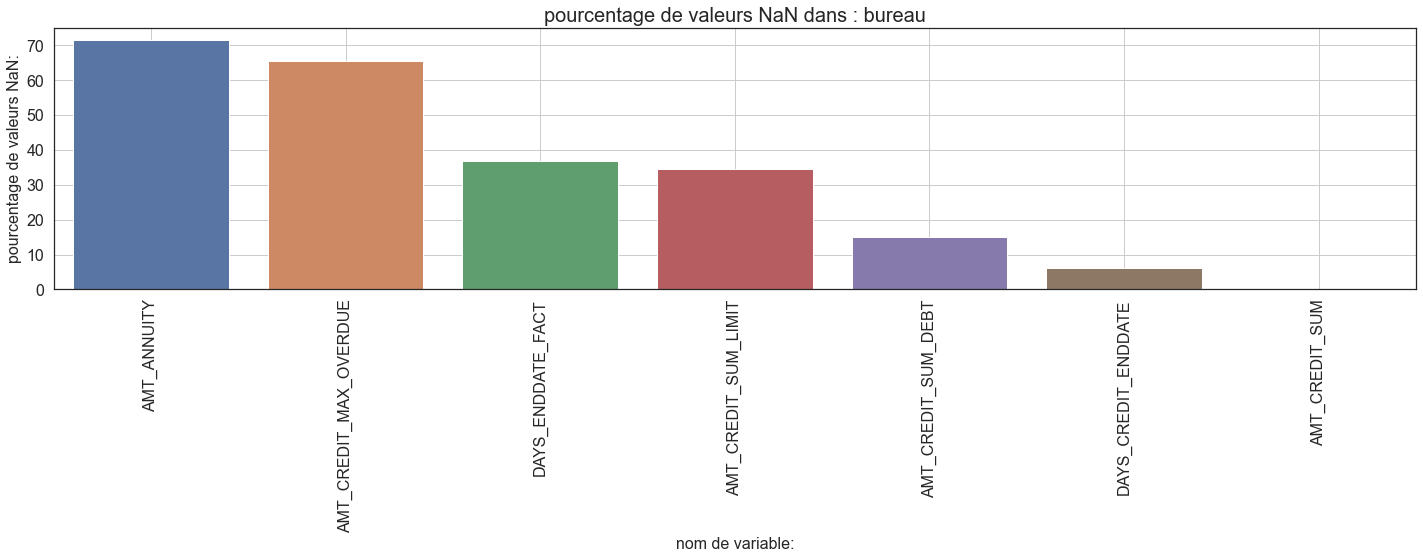

In [32]:
df_nan = eda_kernel.nan_df_create(bureau)
eda_kernel.plot_nan_percent(df_nan, 'bureau', grid=True)

<AxesSubplot:>

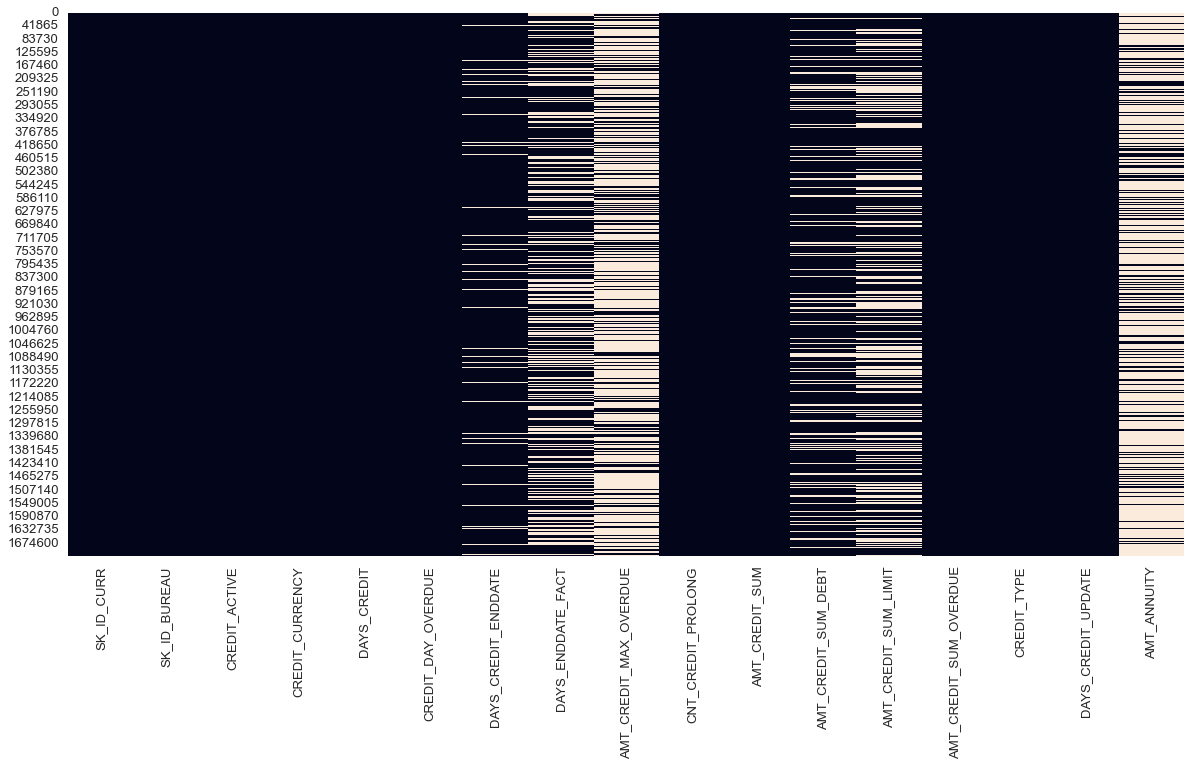

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(bureau.isna(), cbar=False)

In [34]:
df_nan = eda_kernel.nan_df_create(bureau_balance)
eda_kernel.plot_nan_percent(df_nan, 'bureau_balance', grid=True)

le df bureau_balance n'a pas de valeurs manquantes


<AxesSubplot:>

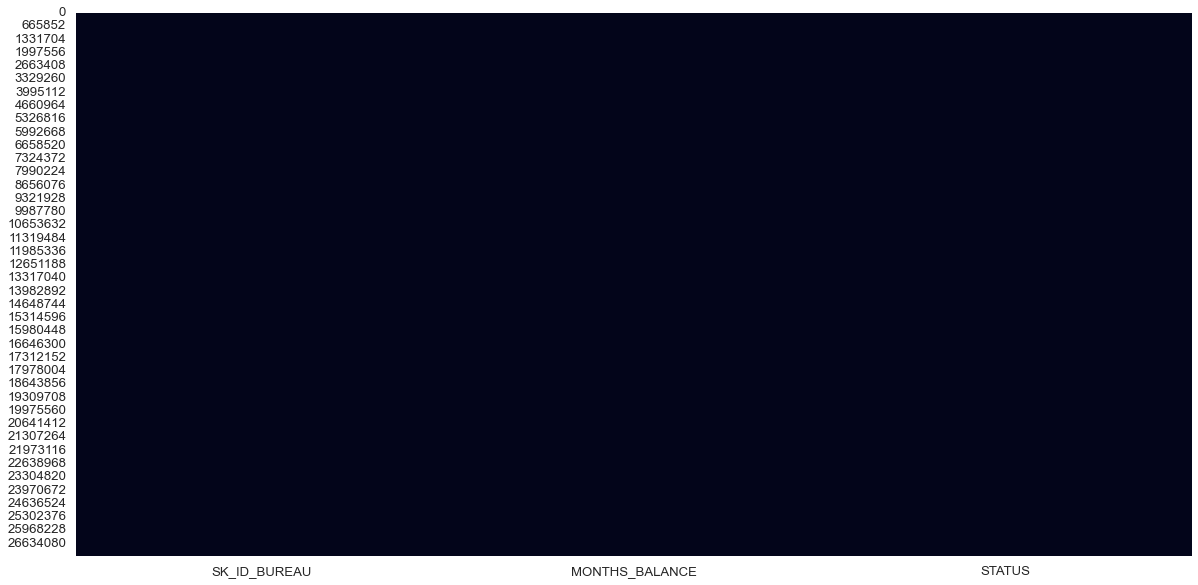

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(bureau_balance.isna(), cbar=False)

nombre de variable avec valeurs manquantes  9


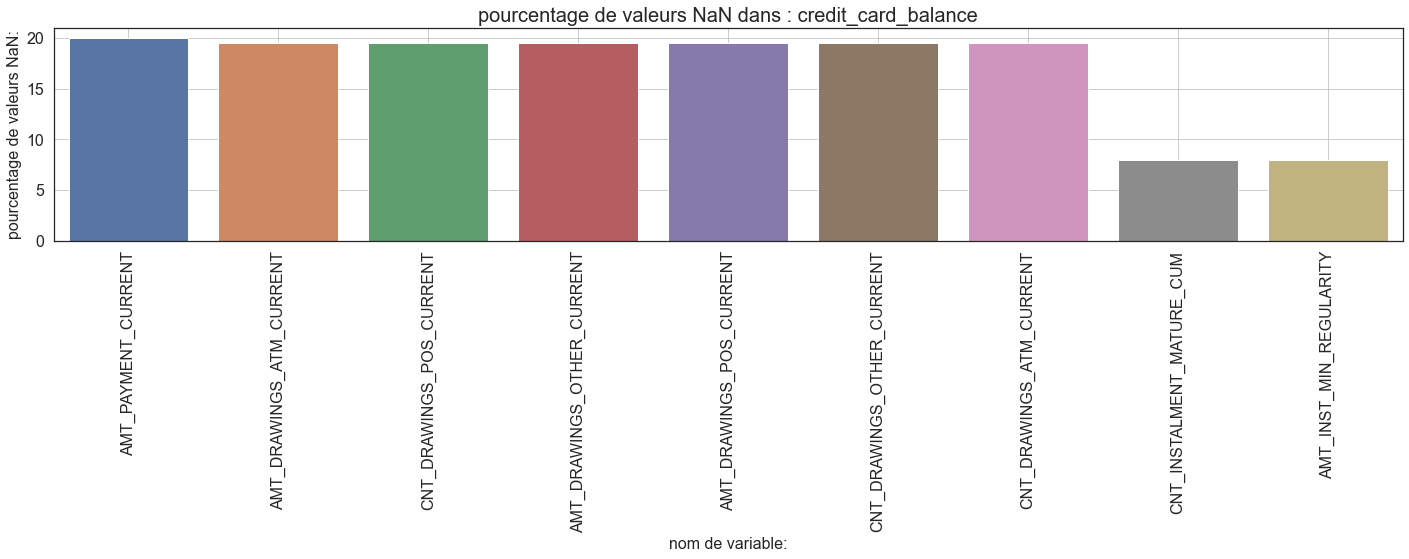

In [36]:
df_nan = eda_kernel.nan_df_create(credit_card_balance)
eda_kernel.plot_nan_percent(df_nan, 'credit_card_balance', grid=True)

<AxesSubplot:>

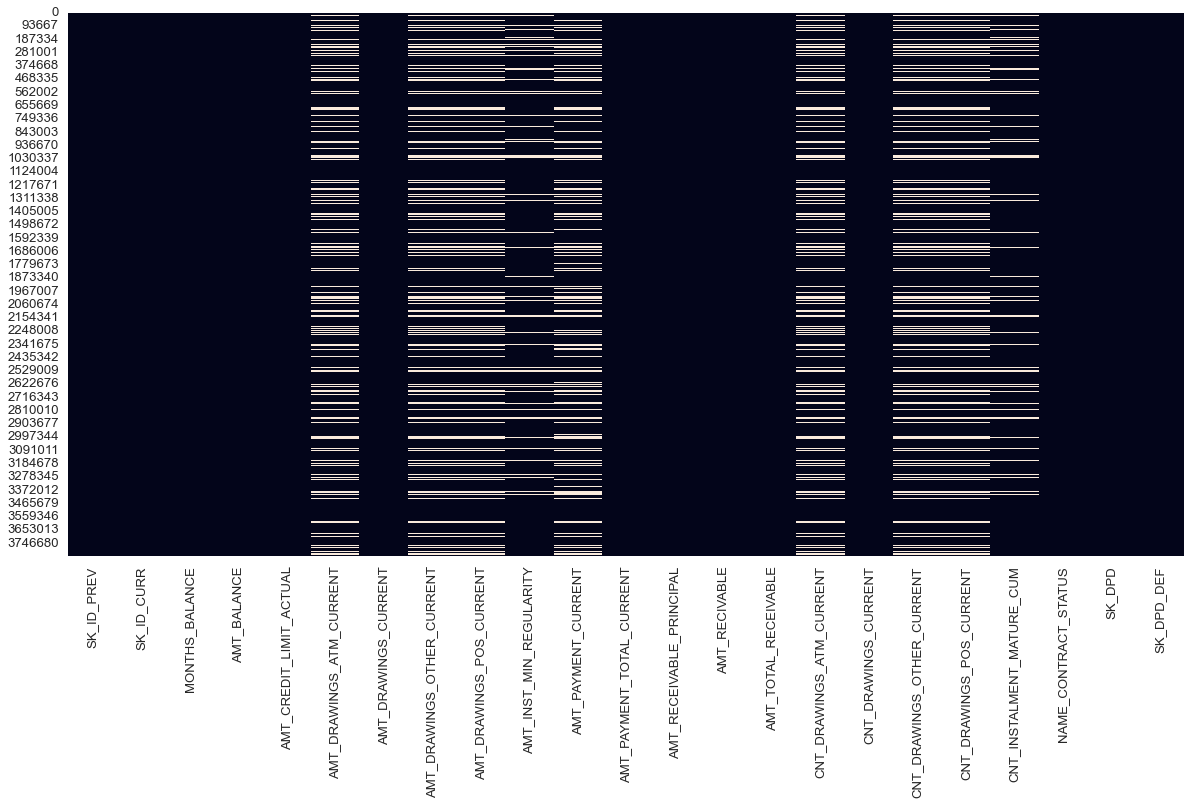

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(credit_card_balance.isna(), cbar=False)

nombre de variable avec valeurs manquantes  2


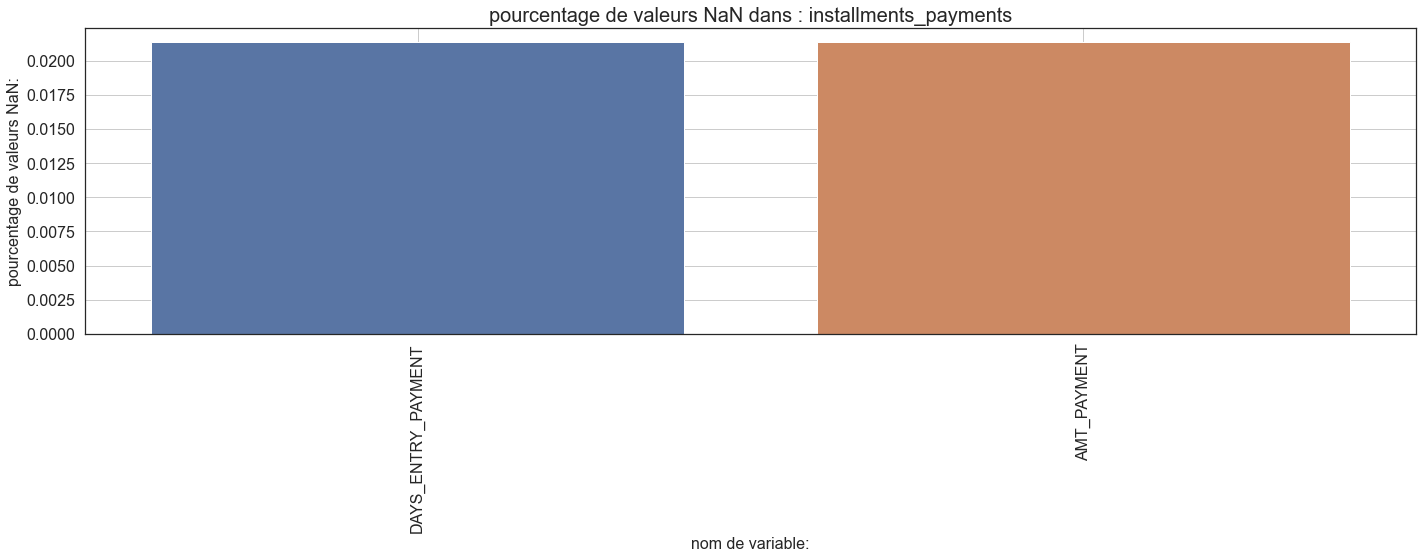

In [38]:
df_nan = eda_kernel.nan_df_create(installments_payments)
eda_kernel.plot_nan_percent(df_nan, 'installments_payments', grid=True)

<AxesSubplot:>

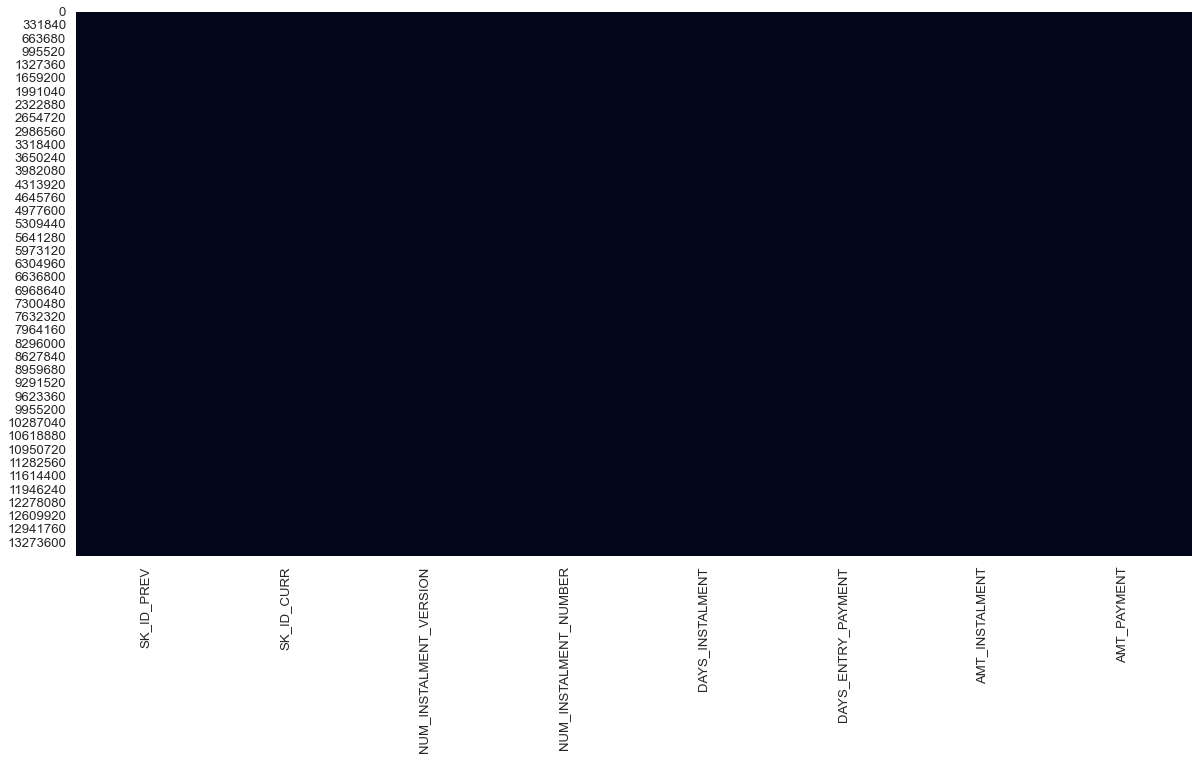

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(installments_payments.isna(), cbar=False)

nombre de variable avec valeurs manquantes  2


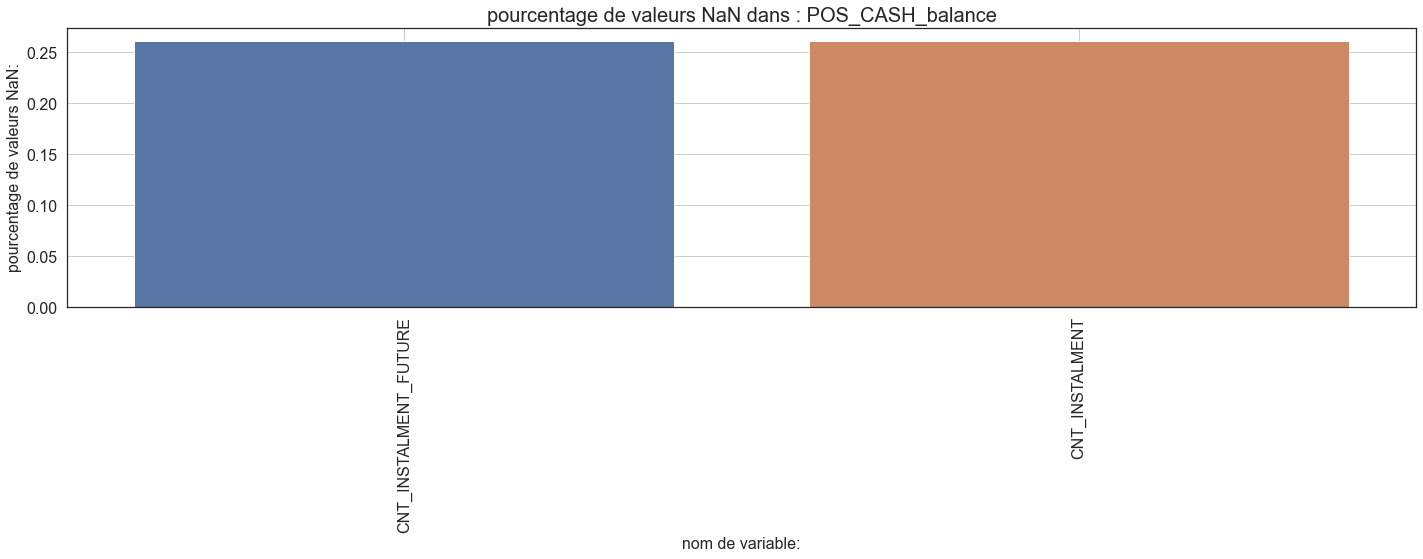

In [40]:
df_nan = eda_kernel.nan_df_create(POS_CASH_balance)
eda_kernel.plot_nan_percent(df_nan, 'POS_CASH_balance', grid=True)

<AxesSubplot:>

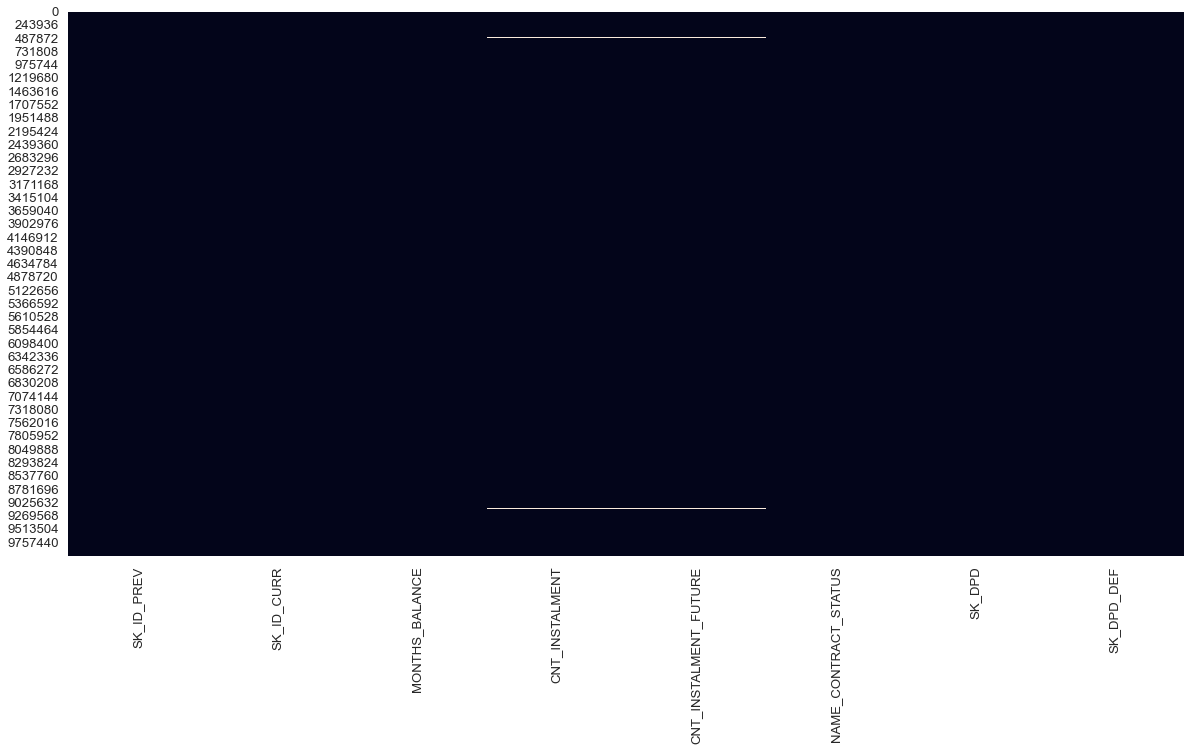

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(POS_CASH_balance.isna(), cbar=False)

nombre de variable avec valeurs manquantes  16


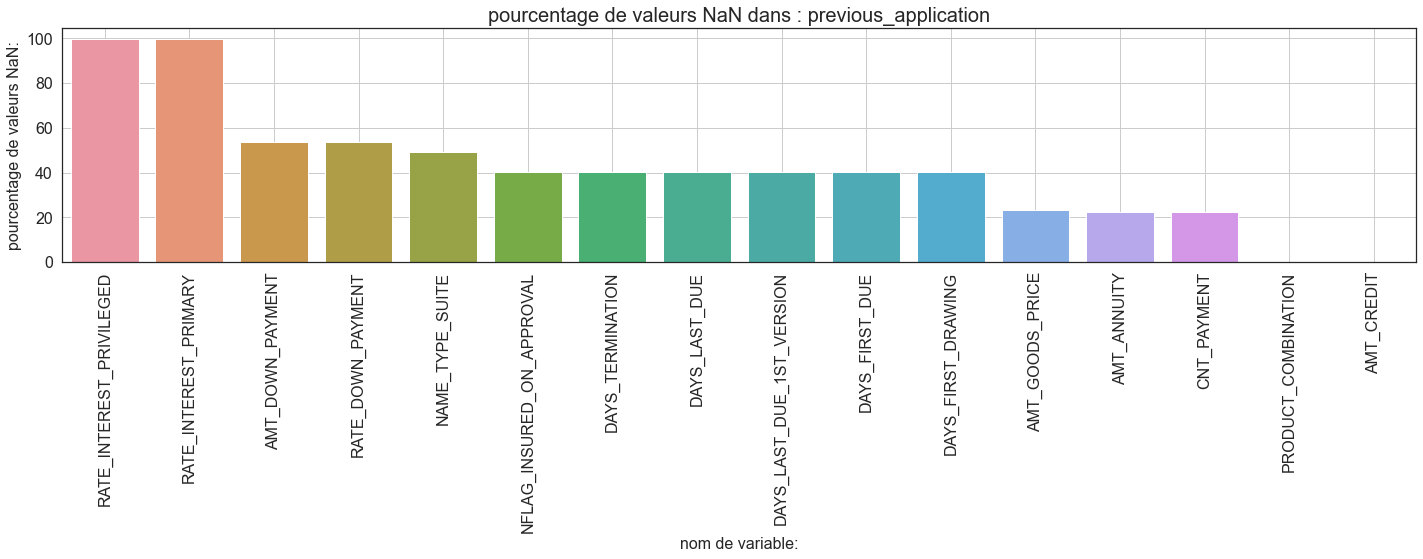

In [42]:
df_nan = eda_kernel.nan_df_create(previous_application)
eda_kernel.plot_nan_percent(df_nan, 'previous_application', grid=True)

<AxesSubplot:>

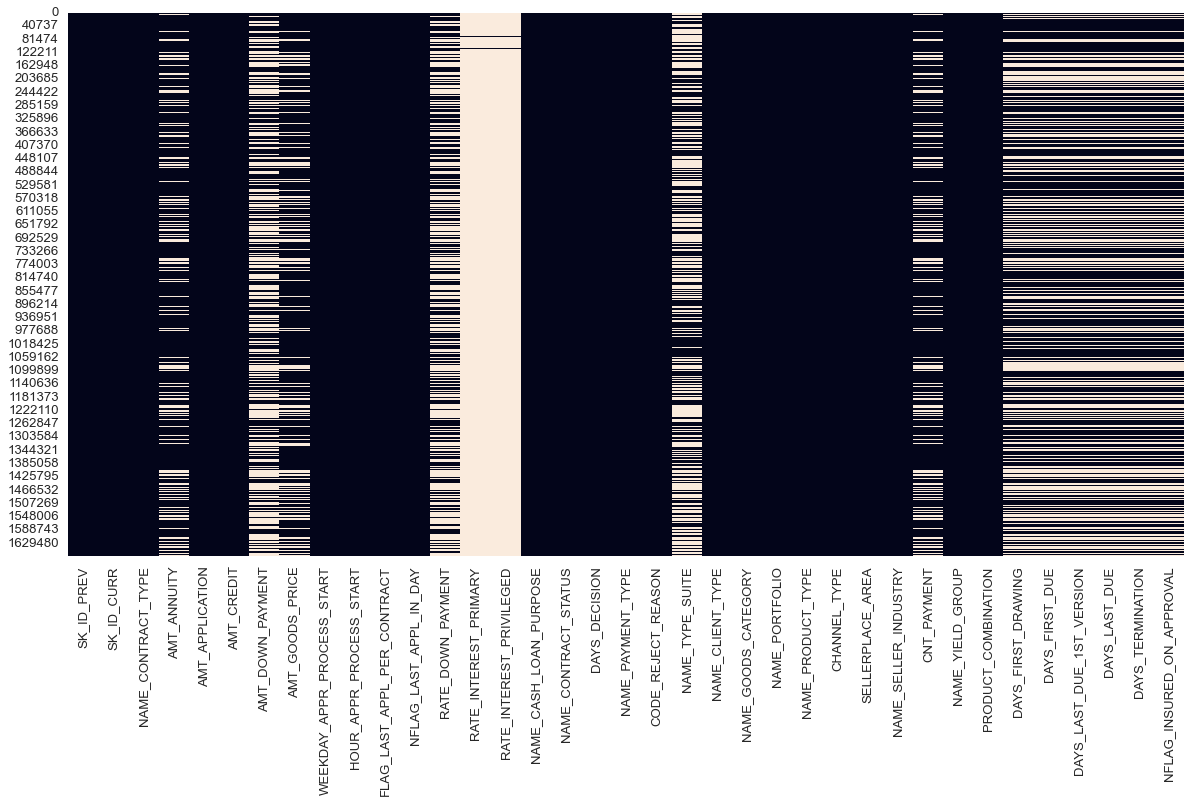

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(previous_application.isna(), cbar=False)

nombre de variable avec valeurs manquantes  1


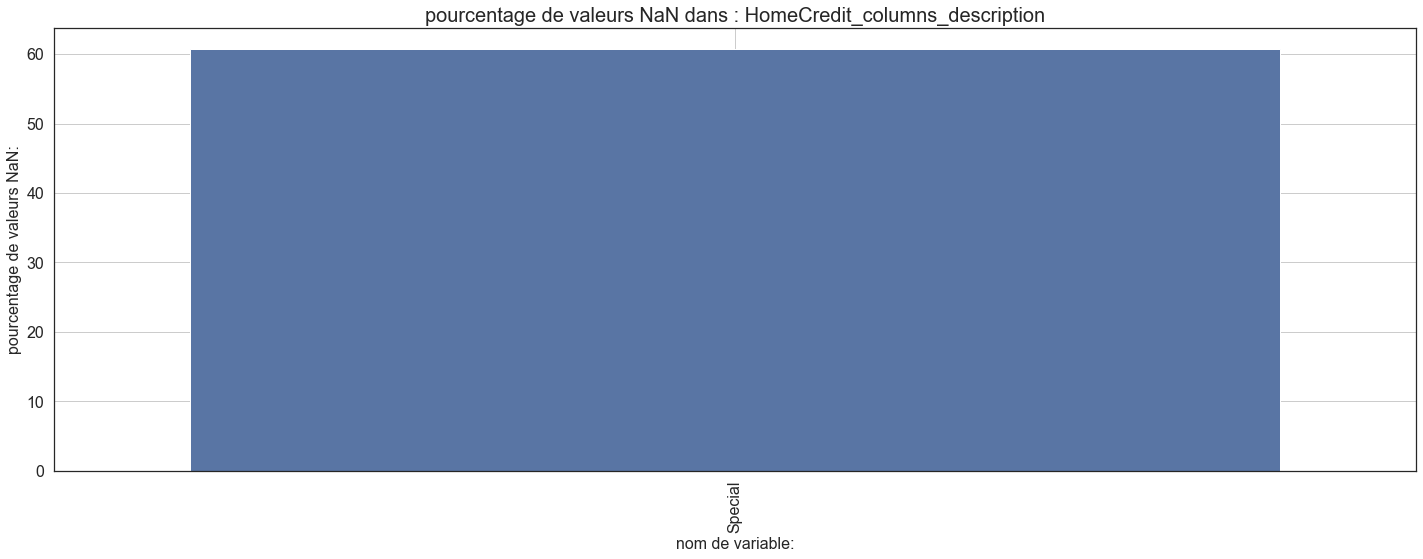

In [44]:
df_nan = eda_kernel.nan_df_create(HomeCredit_columns_description)
eda_kernel.plot_nan_percent(df_nan, 'HomeCredit_columns_description', grid=True)

<AxesSubplot:>

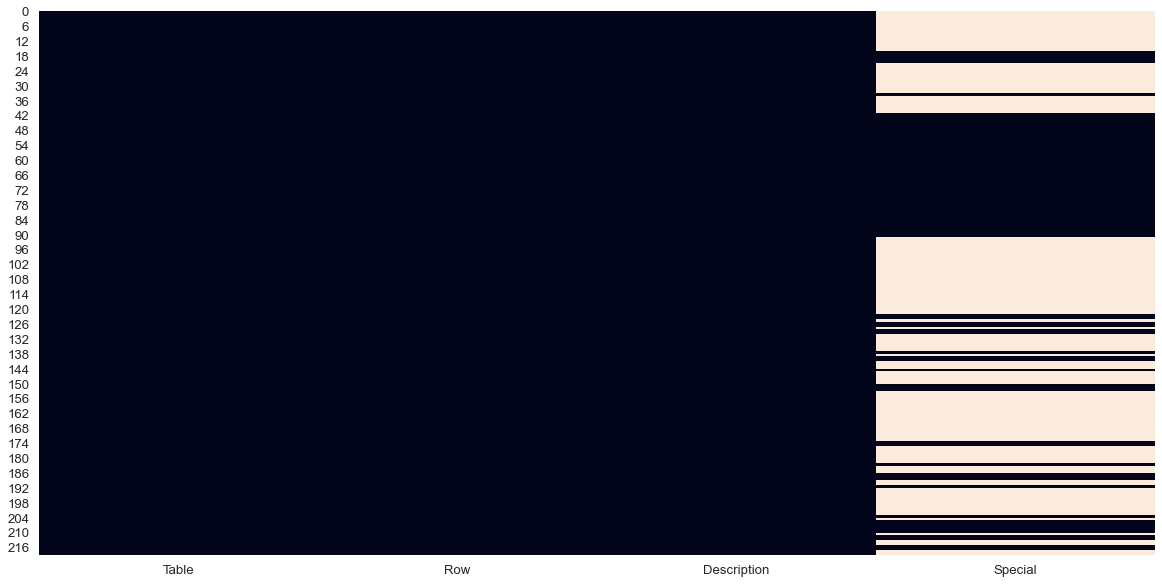

In [45]:
plt.figure(figsize=(20, 10))
sns.heatmap(HomeCredit_columns_description.isna(), cbar=False)

# Analyse exploratoire univariée

### distribution de la target

In [47]:
target_distribution = application_train.TARGET.value_counts()
labels = ['Non-Defaulter', 'Defaulter']
colors = ["#82E0AA", "#EC7063"]

fig = go.Figure(data=[go.Pie(values=target_distribution, labels=labels,
                             textinfo='percent', pull=[0, 0.04],
                             marker=dict(colors=colors))],
                layout=go.Layout(title='Distribution de la TARGET'))

fig.show()

### distribution des variables de type catégorielle

In [ ]:
# Liste des variables qualitatives
cols_cat =application_train.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

In [ ]:
# Let us first see the unique categories of 'NAME_CONTRACT_TYPE'
eda_kernel.print_unique_categories(application_train,
                                             'NAME_CONTRACT_TYPE')

# Plotting the Pie Plot for the column
eda_kernel.plot_categorical_variables_pie(application_train,
                                                    'NAME_CONTRACT_TYPE',
                                                    hole=0.5)

In [ ]:
# Distribution par défaillants/non-défaillants
plt.figure(figsize=(20, 10))
eda_kernel.plot_barplot_comp_target(application_train,'NAME_CONTRACT_TYPE')

In [ ]:
# Let us first see the unique categories of 'CODE_GENDER'
eda_kernel.print_unique_categories(application_train,'CODE_GENDER', show_counts=True)

# Plotting the Pie Plot for the Column
eda_kernel.plot_categorical_variables_pie(application_train,'CODE_GENDER', hole=0.5)

In [ ]:
# Distribution par défaillants/non-défaillants
plt.figure(figsize=(20, 10))
eda_kernel.plot_barplot_comp_target(application_train,'CODE_GENDER')

In [ ]:
# Let us first see the unique categories of 'FLAG_EMP_PHONE'
eda_kernel.print_unique_categories(application_train, 'FLAG_EMP_PHONE')

# Plotting the Pie Plot for the Column
eda_kernel.plot_categorical_variables_pie(application_train,column_name='FLAG_EMP_PHONE', hole=0.5)

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train, 'FLAG_EMP_PHONE')

In [ ]:
# Let us first see the unique categories of 'REGION_RATING_CLIENT_W_CITY'
eda_kernel.print_unique_categories(application_train,
                                             'REGION_RATING_CLIENT_W_CITY')

# Plotting the Pie Plot for the Column
eda_kernel. \
    plot_categorical_variables_pie(application_train,
                                   column_name='REGION_RATING_CLIENT_W_CITY')

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train, 'REGION_RATING_CLIENT_W_CITY')

In [ ]:
# Let us first see the unique categories of 'NAME_EDUCATION_TYPE'
eda_kernel.print_unique_categories(application_train,
                                             'NAME_EDUCATION_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_EDUCATION_TYPE',
                                   figsize=(15, 13), rotation=90,
                                   horizontal_adjust=0.25,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20'],
                                   palette2=['#905998', '#cb3335',
                                             '#59a257', '#477ca8',
                                             '#df7f20'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'NAME_EDUCATION_TYPE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'OCCUPATION_TYPE'
eda_kernel.print_unique_categories(application_train,
                                             'OCCUPATION_TYPE')

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='OCCUPATION_TYPE',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949', '#df7f20',
                                             '#905998', '#52d26c'],
                                   palette2=['#db96c0', '#df7f20',
                                             '#a2c865', '#999999',
                                             '#cb3335', '#72b6a1',
                                             '#965a38', '#e99675',
                                             '#df7f20', '#e5c949',
                                             '#e890be', '#95a3c3',
                                             '#52d26c', '#905998',
                                             '#59a257', '#905998',
                                             '#e6e64c', '#965a38'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'OCCUPATION_TYPE',
                                              rotation=90)

In [ ]:
print(f"Nombre de catégorie de la variable ORGANIZATION_TYPE = \
{len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize=(45, 30))
sns.set(style='whitegrid', font_scale=1.2)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts() \
    .sort_values(ascending=False)
sns.barplot(x=count_organization, y=count_organization.index)
plt.title('Toutes TARGET', pad=20, fontsize=40)
plt.xlabel('Nombre', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1, 2, 2)
percentage_default_per_organization = \
    application_train[application_train.TARGET == 1].ORGANIZATION_TYPE. \
    value_counts() * 100 / count_organization
percentage_default_per_organization = \
    percentage_default_per_organization.dropna(). \
    sort_values(ascending=False)
sns.barplot(x=percentage_default_per_organization,
            y=percentage_default_per_organization.index)
plt.title('Défaillants seuls', pad=20, fontsize=40)
plt.xlabel('Pourcentage par catégorie pour les défaillants', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.suptitle(f'Répartition de ORGANIZATION_TYPE', fontsize=40)
plt.show()

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='REG_CITY_NOT_LIVE_CITY',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])
print('-'*79)
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='REG_CITY_NOT_WORK_CITY',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])
print('-'*79)
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='LIVE_CITY_NOT_WORK_CITY',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_3',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_3')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_2',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_2')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_4',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_4')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_5',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_5')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_6',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train, 'FLAG_DOCUMENT_6')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_7',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_7')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_8',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_8')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_9',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_9')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_10',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_10')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_11',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_11')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_12',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_12')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_13',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_13')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_14',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_14')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_15',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_15')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_16',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_16')

In [ ]:
eda_kernel.plot_categorical_variables_bar(application_train, column_name='FLAG_DOCUMENT_17',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_17')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_18',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_18')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_19',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_19')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_20',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_20')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_DOCUMENT_21',
    figsize=(18, 6), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_DOCUMENT_21')

In [ ]:
# Let us first see the unique categories of 'NAME_HOUSING_TYPE'
eda_kernel. \
    print_unique_categories(application_train, 'NAME_HOUSING_TYPE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_HOUSING_TYPE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c'],
                                   palette2=['#905998', '#477ca8',
                                             '#59a257', '#e6e64c',
                                             '#cb3335', '#df7f20'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'NAME_HOUSING_TYPE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'NAME_FAMILY_STATUS'
eda_kernel. \
    print_unique_categories(application_train, 'NAME_FAMILY_STATUS',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_FAMILY_STATUS',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c'],
                                   palette2=['#59a257', '#477ca8',
                                             '#905998', '#477ca8',
                                             '#df7f20'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'NAME_FAMILY_STATUS',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'NAME_INCOME_TYPE'
eda_kernel. \
    print_unique_categories(application_train, 'NAME_INCOME_TYPE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_INCOME_TYPE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be'],
                                   palette2=['#e890be', '#df7f20',
                                             '#cb3335', '#477ca8',
                                             '#905998', '#59a257'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'NAME_INCOME_TYPE',
                                              rotation=90)

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_OWN_CAR',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_OWN_CAR')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_OWN_REALTY',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['SteelBlue', 'Crimson'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_OWN_REALTY')

In [ ]:
# Let us first see the unique categories of 'NAME_TYPE_SUITE'
eda_kernel. \
    print_unique_categories(application_train, 'NAME_TYPE_SUITE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_TYPE_SUITE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#df7f20', '#e6e64c',
                                             '#965a38', '#cb3335',
                                             '#59a257', '#477ca8',
                                             '#905998'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'NAME_TYPE_SUITE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'WEEKDAY_APPR_PROCESS_START'
eda_kernel. \
    print_unique_categories(application_train, 'WEEKDAY_APPR_PROCESS_START',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='WEEKDAY_APPR_PROCESS_START',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#cb3335', '#477ca8',
                                             '#df7f20', '#905998',
                                             '#965a38', '#e6e64c',
                                             '#59a257'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'WEEKDAY_APPR_PROCESS_START',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'FONDKAPREMONT_MODE'
eda_kernel. \
    print_unique_categories(application_train, 'FONDKAPREMONT_MODE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='FONDKAPREMONT_MODE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#59a257', '#cb3335',
                                             '#477ca8', '#905998'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FONDKAPREMONT_MODE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'HOUSETYPE_MODE'
eda_kernel. \
    print_unique_categories(application_train, 'HOUSETYPE_MODE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='HOUSETYPE_MODE',
                                   figsize=(15, 10),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257'],
                                   palette2=['#477ca8', '#59a257',
                                             '#cb3335'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'HOUSETYPE_MODE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'WALLSMATERIAL_MODE'
eda_kernel. \
    print_unique_categories(application_train, 'WALLSMATERIAL_MODE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='WALLSMATERIAL_MODE',
                                   figsize=(15, 10),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#905998', '#965a38',
                                             '#df7f20', '#477ca8',
                                             '#59a257', '#cb3335',
                                             '#e6e64c'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'WALLSMATERIAL_MODE',
                                              rotation=90)

In [ ]:
# Let us first see the unique categories of 'EMERGENCYSTATE_MODE'
eda_kernel. \
    print_unique_categories(application_train, 'EMERGENCYSTATE_MODE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(application_train,
                                   column_name='EMERGENCYSTATE_MODE',
                                   figsize=(15, 10),
                                   rotation=0, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['Crimson', 'SteelBlue'],
                                   palette2=['SteelBlue', 'Crimson'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'EMERGENCYSTATE_MODE')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_MOBIL',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_MOBIL')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_WORK_PHONE',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_WORK_PHONE')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_CONT_MOBILE',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_CONT_MOBILE')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_PHONE',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,'FLAG_PHONE')

In [ ]:
eda_kernel.plot_categorical_variables_bar(
    application_train, column_name='FLAG_EMAIL',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

In [ ]:
# Distribution par défaillants/non-défaillants
eda_kernel.plot_barplot_comp_target(application_train,
                                              'FLAG_EMAIL')

## dataset Bureau

In [ ]:


# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')
print("-"*79)



In [ ]:
# Liste des variables qualitatives
cols_cat_bureau = \
    bureau.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau

In [ ]:
# Let us first see the unique categories of 'CREDIT_ACTIVE'
eda_kernel.print_unique_categories(bureau_merged,
                                             'CREDIT_ACTIVE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(bureau_merged, column_name='CREDIT_ACTIVE',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#905998', '#59a257',
                                             '#477ca8', '#cb3335'])

In [ ]:
# Let us first see the unique categories of 'CREDIT_CURRENCY'
eda_kernel.print_unique_categories(bureau_merged,
                                             'CREDIT_CURRENCY')

# Plotting the Pie Plot for the Column
eda_kernel. \
    plot_categorical_variables_pie(bureau_merged,
                                   column_name='CREDIT_CURRENCY')

In [ ]:
# Let us first see the unique categories of 'CREDIT_CURRENCY'
eda_kernel.print_unique_categories(bureau_merged,
                                             'CREDIT_CURRENCY',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(bureau_merged,
                                   column_name='CREDIT_CURRENCY',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#59a257', '#cb3335',
                                             '#477ca8'])

In [ ]:
# Let us first see the unique categories of 'CREDIT_TYPE'
eda_kernel.print_unique_categories(bureau_merged,
                                             'CREDIT_TYPE')

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(bureau_merged,
                                   column_name='CREDIT_TYPE',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949'],
                                   palette2=['#df7f20', '#905998',
                                             '#999999', '#477ca8',
                                             '#cb3335', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#59a257', '#72b6a1',
                                             '#e99675'])

## dataset Bureau_balance

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')
print("-"*79)


In [ ]:
# Liste des variables qualitatives
cols_cat_bureau_bal = \
    bureau_balance.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau_bal

In [ ]:
# Let us first see the unique categories of 'STATUS'
eda_kernel.print_unique_categories(bureau_balance,
                                             'STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variable_bar(bureau_balance, column_name='STATUS',
                                  horizontal_adjust=0.3,
                                  figsize=(15, 7), fontsize_percent=16)

## dataset credit_card_balance

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe credit_card_balance')
cc_balance_merged = application_train.iloc[:, :2].merge(credit_card_balance,
                                                        on='SK_ID_CURR',
                                                        how='left')
print("-"*79)

In [ ]:
# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda_kernel.print_unique_categories(cc_balance_merged,
                                             'NAME_CONTRACT_STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(cc_balance_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   figsize=(15, 8), rotation=90,
                                   horizontal_adjust=0.25,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#905998', '#e6e64c',
                                             '#cb3335', '#59a257',
                                             '#477ca8', '#df7f20'])

## dataset POS_CASH_balance

In [ ]:


# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)



In [ ]:
# Liste des variables qualitatives
cols_cat_posh = \
    pos_cash_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_posh

In [ ]:


# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda_kernel.print_unique_categories(pos_cash_merged,
                                             'NAME_CONTRACT_STATUS')

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(pos_cash_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999'],
                                   palette2=['#e890be', '#965a38',
                                             '#df7f20', '#905998',
                                             '#59a257', '#e6e64c',
                                             '#477ca8', '#cb3335'])



## dataset previous_application

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var = 'Création dataframe de travail : merge TARGET '
print(var + 'avec dataframe previous_application')
prev_merged = application_train.iloc[:, :2].merge(previous_application,
                                                  on='SK_ID_CURR',
                                                  how='left')
print("-"*79)

In [ ]:


# Liste des variables qualitatives
cols_cat_prev = \
    prev_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_prev



In [ ]:


# Let us first see the unique categories of 'NAME_CONTRACT_TYPE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_CONTRACT_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_TYPE',
                                   horizontal_adjust=0.3,
                                   figsize=(20, 10), fontsize_percent=18,
                                   rotation=90,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#905998', '#59a257',
                                             '#cb3335', '#477ca8'])



In [ ]:


# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_CONTRACT_STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   horizontal_adjust=0.25,
                                   figsize=(20, 8), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#59a257', '#477ca8',
                                             '#905998', '#cb3335'])



In [ ]:


# Let us first see the unique categories of 'CODE_REJECT_REASON'
eda_kernel.print_unique_categories(prev_merged,
                                             'CODE_REJECT_REASON',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='CODE_REJECT_REASON',
                                   horizontal_adjust=0.18,
                                   figsize=(20, 8), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999'],
                                   palette2=['#e6e64c', '#59a257',
                                             '#477ca8', '#965a38',
                                             '#905998', '#e890be',
                                             '#df7f20', '#cb3335',
                                             '#999999'])



In [ ]:


# Let us first see the unique categories of 'CHANNEL_TYPE'
eda_kernel.print_unique_categories(prev_merged,
                                             'CHANNEL_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='CHANNEL_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be'],
                                   palette2=['#e6e64c', '#df7f20',
                                             '#cb3335', '#477ca8',
                                             '#905998', '#59a257',
                                             '#965a38', '#e890be'])



In [ ]:


# Let us first see the unique categories of 'CREDIT_ACTIVE'
eda_kernel.print_unique_categories(prev_merged,
                                             'PRODUCT_COMBINATION',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='PRODUCT_COMBINATION',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(25, 15), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949', '#2f51a1',
                                             '#d91a61'],
                                   palette2=['#95a3c3', '#e99675',
                                             '#72b6a1', '#e6e64c',
                                             '#db96c0', '#cb3335',
                                             '#999999', '#59a257',
                                             '#a2c865', '#e5c949',
                                             '#905998', '#477ca8',
                                             '#d91a61', '#e890be',
                                             '#df7f20', '#965a38',
                                             '#2f51a1'])



In [ ]:


# Let us first see the unique categories of 'WEEKDAY_APPR_PROCESS_START'
eda_kernel.print_unique_categories(prev_merged,
                                             'WEEKDAY_APPR_PROCESS_START',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='WEEKDAY_APPR_PROCESS_START',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(15, 10), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#df7f20', '#59a257',
                                             '#477ca8', '#905998',
                                             '#cb3335', '#e6e64c',
                                             '#965a38'])



In [ ]:


# Let us first see the unique categories of 'FLAG_LAST_APPL_PER_CONTRACT'
eda_kernel.print_unique_categories(prev_merged,
                                             'FLAG_LAST_APPL_PER_CONTRACT',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='FLAG_LAST_APPL_PER_CONTRACT',
                                   horizontal_adjust=0.3,
                                   figsize=(10, 7), fontsize_percent=16,
                                   palette1=['SteelBlue', 'crimson'],
                                   palette2=['crimson', 'SteelBlue'])



In [ ]:


# Let us first see the unique categories of 'NAME_CASH_LOAN_PURPOSE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_CASH_LOAN_PURPOSE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CASH_LOAN_PURPOSE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(35, 25), fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949', '#df7f20',
                                             '#905998', '#52d26c',
                                             '#c48f1e', '#cc5bdb',
                                             '#7b358b', '#ebf633',
                                             '#cb245d', '#51e787',
                                             '#33f3f6'],
                                   palette2=['#df7f20', '#905998',
                                             '#999999', '#477ca8',
                                             '#cb3335', '#72b6a1',
                                             '#df7f20', '#965a38',
                                             '#999999', '#59a257',
                                             '#e6e64c', '#d9314b',
                                             '#cf31d9', '#6231d9',
                                             '#905998', '#31bcd9',
                                             '#31d983', '#31d935',
                                             '#6cd931', '#e890be',
                                             '#e99675', '#d9b331',
                                             '#477ca8', '#cb3335',
                                             '#fcf40a'])



In [ ]:


# Let us first see the unique categories of 'NAME_PAYMENT_TYPE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_PAYMENT_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PAYMENT_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(15, 12), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#477ca8', '#59a257',
                                             '#cb3335', '#905998'])



In [ ]:
# Let us first see the unique categories of 'NAME_TYPE_SUITE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_TYPE_SUITE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_TYPE_SUITE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#965a38', '#e6e64c',
                                             '#df7f20', '#cb3335',
                                             '#59a257', '#477ca8',
                                             '#905998'])

In [ ]:


# Let us first see the unique categories of 'NAME_CLIENT_TYPE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_CLIENT_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CLIENT_TYPE',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#905998', '#477ca8',
                                             '#cb3335', '#59a257'])



In [ ]:


# Let us first see the unique categories of 'NAME_GOODS_CATEGORY'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_GOODS_CATEGORY',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_GOODS_CATEGORY',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(30, 20), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949', '#df7f20',
                                             '#905998', '#52d26c',
                                             '#c48f1e', '#cc5bdb',
                                             '#7b358b', '#ebf633',
                                             '#cb245d', '#51e787',
                                             '#33f3f6', '#9c75aa',
                                             '#423d78'],
                                   palette2=['#df7f20', '#a2c865',
                                             '#cb3335', '#72b6a1',
                                             '#e99675', '#477ca8',
                                             '#52d26c', '#e890be',
                                             '#905998', '#72b6a1',
                                             '#df7f20', '#965a38',
                                             '#e5c949', '#59a257',
                                             '#313ad9', '#905998',
                                             '#95a3c3', '#31d935',
                                             '#cc5bdb', '#e6e64c',
                                             '#df7f20', '#999999',
                                             '#d96b31', '#db96c0',
                                             '#c48f1e', '#fc0aec'])



In [ ]:


# Let us first see the unique categories of 'NAME_PORTFOLIO'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_PORTFOLIO',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PORTFOLIO',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20'],
                                   palette2=['#905998', '#59a257',
                                             '#477ca8', '#cb3335',
                                             '#df7f20'])



In [ ]:
# Let us first see the unique categories of 'NAME_PRODUCT_TYPE'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_PRODUCT_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PRODUCT_TYPE',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257'],
                                   palette2=['#59a257', '#cb3335',
                                             '#477ca8'])

In [ ]:


# Let us first see the unique categories of 'NAME_SELLER_INDUSTRY'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_SELLER_INDUSTRY',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_SELLER_INDUSTRY',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675'],
                                   palette2=['#e890be', '#cb3335',
                                             '#59a257', '#999999',
                                             '#477ca8', '#965a38',
                                             '#df7f20', '#72b6a1',
                                             '#905998', '#e6e64c',
                                             '#e99675'])



In [ ]:


# Let us first see the unique categories of 'NAME_YIELD_GROUP'
eda_kernel.print_unique_categories(prev_merged,
                                             'NAME_YIELD_GROUP',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda_kernel. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_YIELD_GROUP',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(15, 9), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20'],
                                   palette2=['#cb3335', '#59a257',
                                             '#477ca8', '#905998',
                                             '#df7f20'])



### distribution des variables de type numérique

In [ ]:
# Liste des variables quantitatives
cols_num = \
    application_train.select_dtypes(include=[np.number]).columns.to_list()
cols_num

In [ ]:
plt.hist(application_train['DAYS_BIRTH']*-1/365, color='SteelBlue',
         bins=25)
plt.title('Âge du demandeur')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre')
plt.grid(False)
plt.show()

In [ ]:
# Transformer l'âge en années à partir du nombre de jours
application_train['AGE_YEARS'] = \
    application_train['DAYS_BIRTH'] * -1 / 365

In [ ]:
# Affiche les quantiles
eda_kernel.print_percentiles(application_train, 'AGE_YEARS')
# Affiche boxplot, distplot pour l'âge
eda_kernel.plot_continuous_variables(application_train,
                                               'AGE_YEARS',
                                               plots=['distplot', 'box'])
# Suppression de la variable nouvellement ajoutée
_ = application_train.pop('AGE_YEARS')

In [ ]:
# Transformer en années à partir du nombre de jours
application_train['YEARS_EMPLOYED'] = \
    application_train['DAYS_EMPLOYED'] * -1 / 365
# Affiche les quantiles
eda_kernel.print_percentiles(application_train, 'DAYS_EMPLOYED')
eda_kernel.print_percentiles(application_train, 'YEARS_EMPLOYED')
# Affiche boxplot
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_EMPLOYED',
                                               plots=['box'],
                                               figsize=(8, 6))
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_EMPLOYED',
                                               plots=['box'],
                                               scale_limits=[0, 70],
                                               figsize=(8, 6))
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_EMPLOYED',
                                               plots=['distplot', 'box'],
                                               scale_limits=[0, 70],
                                               figsize=(15, 6))
# Suppression de la variable nouvellement ajoutée
_ = application_train.pop('YEARS_EMPLOYED')

In [ ]:
eda_kernel.plot_continuous_variables(application_train,
                                               'DAYS_REGISTRATION',
                                               plots=['box'],
                                               figsize=(8, 6))
eda_kernel.plot_continuous_variables(application_train,
                                               'DAYS_REGISTRATION',
                                               plots=['distplot', 'box'],
                                               scale_limits=[-2200, -2000],
                                               figsize=(15, 6))

In [ ]:
eda_kernel.plot_continuous_variables(application_train,
                                               'DAYS_ID_PUBLISH',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Distplot et boxplot de EXT_SOURCE_1
eda_kernel.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_1',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))
# Distplot et boxplot de EXT_SOURCE_2
eda_kernel.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_2',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))
# Distplot et boxplot de EXT_SOURCE_3
eda_kernel.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_3',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))

In [ ]:
# Boxplot de FLOORSMAX_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMAX_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de FLOORSMAX_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMAX_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de FLOORSMAX_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMAX_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de FLOORSMIN_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMIN_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de FLOORSMIN_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMIN_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de FLOORSMIN_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'FLOORSMIN_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_GOODS_PRICE
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_GOODS_PRICE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de CNT_CHILDREN
eda_kernel.plot_continuous_variables(application_train,
                                               'CNT_CHILDREN',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de CNT_CHILDREN
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_INCOME_TOTAL',
                                               plots=['box'],
                                               figsize=(8, 7))
# Zoom hors outlier
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_INCOME_TOTAL',
                                               plots=['box'],
                                               figsize=(8, 7),
                                               scale_limits=[0, 25e5])
# Zoom hors outlier
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_INCOME_TOTAL',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 7),
                                               scale_limits=[0, 33e3])

In [ ]:
# Boxplot de AMT_CREDIT
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_CREDIT',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de AMT_ANNUITY
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_ANNUITY',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_ANNUITY
eda_kernel.plot_continuous_variables(application_train,
                                               'REGION_POPULATION_RELATIVE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de OWN_CAR_AGE
eda_kernel.plot_continuous_variables(application_train,
                                               'OWN_CAR_AGE',
                                               plots=['box'],
                                               figsize=(8, 6))
eda_kernel.plot_continuous_variables(application_train,
                                               'OWN_CAR_AGE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6),
                                               scale_limits=[0, 30])

In [ ]:
# Boxplot de CNT_FAM_MEMBERS
eda_kernel.plot_continuous_variables(application_train,
                                               'CNT_FAM_MEMBERS',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# CDF de REGION_RATING_CLIENT
eda_kernel.plot_continuous_variables(application_train,
                                               'REGION_RATING_CLIENT',
                                               plots=['distplot', 'CDF'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de REG_REGION_NOT_LIVE_REGION
eda_kernel.plot_continuous_variables(application_train,
                                               'REG_REGION_NOT_LIVE_REGION',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de REG_REGION_NOT_WORK_REGION
eda_kernel.plot_continuous_variables(application_train,
                                               'REG_REGION_NOT_WORK_REGION',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de LIVE_REGION_NOT_WORK_REGION
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVE_REGION_NOT_WORK_REGION',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de APARTMENTS_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'APARTMENTS_AVG',
                                               plots=['box'],
                                               figsize=(8, 6))
# Zoom
eda_kernel.plot_continuous_variables(application_train,
                                               'APARTMENTS_AVG',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[0, 0.25])
# CDF
eda_kernel.plot_continuous_variables(application_train,
                                               'APARTMENTS_AVG',
                                               plots=['distplot', 'CDF'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de APARTMENTS_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'APARTMENTS_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de APARTMENTS_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'APARTMENTS_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de BASEMENTAREA_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'BASEMENTAREA_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de BASEMENTAREA_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'BASEMENTAREA_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de BASEMENTAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'BASEMENTAREA_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BEGINEXPLUATATION_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BEGINEXPLUATATION_AVG',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BEGINEXPLUATATION_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BEGINEXPLUATATION_MODE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BEGINEXPLUATATION_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BEGINEXPLUATATION_MEDI',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BUILD_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BUILD_AVG',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BUILD_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BUILD_MODE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de YEARS_BUILD_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'YEARS_BUILD_MEDI',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de COMMONAREA_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'COMMONAREA_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de COMMONAREA_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'COMMONAREA_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de COMMONAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'COMMONAREA_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# CDF de ELEVATORS_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'ELEVATORS_AVG',
                                               plots=['distplot', 'CDF'],
                                               figsize=(15, 6))

In [ ]:
# CDF de ELEVATORS_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'ELEVATORS_MODE',
                                               plots=['distplot', 'CDF'],
                                               figsize=(15, 6))

In [ ]:
# CDF de ELEVATORS_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'ELEVATORS_MEDI',
                                               plots=['distplot', 'CDF'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de ENTRANCES_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'ENTRANCES_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de ENTRANCES_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'ENTRANCES_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de ENTRANCES_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'ENTRANCES_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LANDAREA_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'LANDAREA_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LANDAREA_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'LANDAREA_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LANDAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'LANDAREA_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAPARTMENTS_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAPARTMENTS_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAPARTMENTS_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAPARTMENTS_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAPARTMENTS_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAPARTMENTS_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAREA_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAREA_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAPARTMENTS_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAREA_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de LIVINGAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'LIVINGAREA_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAPARTMENTS_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAPARTMENTS_AVG',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAPARTMENTS_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAPARTMENTS_MODE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAPARTMENTS_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAPARTMENTS_MEDI',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAREA_AVG
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAREA_AVG',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAREA_MODE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de NONLIVINGAREA_MEDI
eda_kernel.plot_continuous_variables(application_train,
                                               'NONLIVINGAREA_MEDI',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de TOTALAREA_MODE
eda_kernel.plot_continuous_variables(application_train,
                                               'TOTALAREA_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de OBS_30_CNT_SOCIAL_CIRCLE
eda_kernel.plot_continuous_variables(application_train,
                                               'OBS_30_CNT_SOCIAL_CIRCLE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de DEF_30_CNT_SOCIAL_CIRCLE
eda_kernel.plot_continuous_variables(application_train,
                                               'DEF_30_CNT_SOCIAL_CIRCLE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de OBS_60_CNT_SOCIAL_CIRCLE
eda_kernel.plot_continuous_variables(application_train,
                                               'OBS_60_CNT_SOCIAL_CIRCLE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de DEF_60_CNT_SOCIAL_CIRCLE
eda_kernel.plot_continuous_variables(application_train,
                                               'DEF_60_CNT_SOCIAL_CIRCLE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Boxplot de DAYS_LAST_PHONE_CHANGE
eda_kernel.plot_continuous_variables(application_train,
                                               'DAYS_LAST_PHONE_CHANGE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_HOUR
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_HOUR',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_DAY
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_DAY',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_WEEK
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_WEEK',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_MON
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_MON',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_QRT
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_QRT',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

In [ ]:
# Violinplot de AMT_REQ_CREDIT_BUREAU_YEAR
eda_kernel.plot_continuous_variables(application_train,
                                               'AMT_REQ_CREDIT_BUREAU_YEAR',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

## Dataset Bureau

In [ ]:
# Liste des variables quantitatives
cols_num_bureau = \
    bureau.select_dtypes(include=[np.number]).columns.to_list()
cols_num_bureau

In [ ]:
# Transformer en années à partir du nombre de jours
bureau_merged['YEARS_CREDIT'] = \
    bureau_merged['DAYS_CREDIT'] * -1 / 365
# Affiche les quantiles
eda_kernel.print_percentiles(bureau_merged, 'YEARS_CREDIT')
# Affiche boxplot, distplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'YEARS_CREDIT',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 8))
# Suppression de la variable nouvellement ajoutée
_ = bureau_merged.pop('YEARS_CREDIT')

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'DAYS_CREDIT_ENDDATE',
                                               plots=['box'], figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'DAYS_ENDDATE_FACT',
                                               plots=['box'],
                                               figsize=(8, 8),
                                               scale_limits=[-40000, 0])

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'DAYS_CREDIT_UPDATE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'DAYS_CREDIT_UPDATE',
                                               plots=['box'],
                                               figsize=(8, 8),
                                               scale_limits=[-40000, 400])



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'CREDIT_DAY_OVERDUE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'CREDIT_DAY_OVERDUE',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_CREDIT_MAX_OVERDUE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_CREDIT_MAX_OVERDUE',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'CNT_CREDIT_PROLONG',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'CNT_CREDIT_PROLONG',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_CREDIT_SUM',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_CREDIT_SUM',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_DEBT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_CREDIT_SUM_DEBT',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_LIMIT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_CREDIT_SUM_LIMIT',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_OVERDUE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_CREDIT_SUM_OVERDUE',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_merged, 'AMT_ANNUITY',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(bureau_merged,
                                               'AMT_ANNUITY',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
## dataset bureau_balance

In [ ]:
# Liste des variables quantitatives
cols_num = \
    bureau_balance.select_dtypes(include=[np.number]).columns.to_list()
cols_num

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(bureau_balance, 'MONTHS_BALANCE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variable(bureau_balance,
                                              'MONTHS_BALANCE',
                                              plots=['violin'],
                                              figsize=(8, 6))

In [ ]:
# Affiche boxplot
eda_kernel.plot_continuous_variable(bureau_balance,
                                              'MONTHS_BALANCE',
                                              plots=['box'],
                                              figsize=(8, 6))

## dataset credit_card_balance

In [ ]:
# Liste des variables quantitatives
cols_num = \
    cc_balance_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num

In [ ]:
cc_balance_merged = cc_balance_merged.groupby('SK_ID_PREV').mean()

In [ ]:
# Affiche boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_BALANCE',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_TOTAL_RECEIVABLE',
                                               plots=['violin'],
                                               figsize=(8, 6))
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_TOTAL_RECEIVABLE',
                                               plots=['box'],
                                               figsize=(8, 6))
# Affiche PDF
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_BALANCE',
                                               plots=['distplot'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'CNT_INSTALMENT_MATURE_CUM',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'MONTHS_BALANCE',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_CREDIT_LIMIT_ACTUAL',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_ATM_CURRENT',
                                               plots=['box'],
                                               figsize=(8, 6))
# Zoom
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_ATM_CURRENT',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[0, 1000])

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_CURRENT',
                                               plots=['box'],
                                               figsize=(8, 6))
# Zoom
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_CURRENT',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[0, 0.05e6])

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_OTHER_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_DRAWINGS_POS_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_INST_MIN_REGULARITY',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_PAYMENT_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_PAYMENT_TOTAL_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_RECEIVABLE_PRINCIPAL',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'AMT_RECIVABLE',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:


# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'CNT_DRAWINGS_ATM_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'CNT_DRAWINGS_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'CNT_DRAWINGS_OTHER_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'CNT_DRAWINGS_POS_CURRENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'SK_DPD',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(cc_balance_merged,
                                               'SK_DPD_DEF',
                                               plots=['violin'],
                                               figsize=(8, 6))

## dataset installments_payments

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
part1 = 'Création dataframe de travail : merge TARGET '
print(part1 + 'avec dataframe installments_payments')
installments_merged = \
    application_train.iloc[:, :2].merge(installments_payments,
                                        on='SK_ID_CURR',
                                        how='left')
print("-"*79)

In [ ]:


# Liste des variables quantitatives
cols_num_instpaie = \
    installments_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_instpaie



In [ ]:
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'DAYS_INSTALMENT',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:


# Affiche Boxplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'DAYS_ENTRY_PAYMENT',
                                               plots=['box'],
                                               figsize=(8, 6))



In [ ]:


# Affiche Violinplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'NUM_INSTALMENT_VERSION',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
# Affiche Boxplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'NUM_INSTALMENT_NUMBER',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'AMT_INSTALMENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche Violinplot
eda_kernel.plot_continuous_variables(installments_merged,
                                               'AMT_PAYMENT',
                                               plots=['violin'],
                                               figsize=(8, 6))



## dataset POS_CASH_balance

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)

In [ ]:


# Liste des variables quantitatives
cols_num_posh = \
    pos_cash_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_posh



In [ ]:
# Affiche Violinplot
eda_kernel.plot_continuous_variables(pos_cash_merged,
                                               'MONTHS_BALANCE',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche Boxplot
eda_kernel.plot_continuous_variables(pos_cash_merged,
                                               'CNT_INSTALMENT',
                                               plots=['box'],
                                               figsize=(8, 6))



In [ ]:


# Affiche Boxplot
eda_kernel.plot_continuous_variables(pos_cash_merged,
                                               'CNT_INSTALMENT_FUTURE',
                                               plots=['box'],
                                               figsize=(8, 6))



In [ ]:


# Affiche Violinplot
eda_kernel.plot_continuous_variables(pos_cash_merged,
                                               'SK_DPD',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:


# Affiche Violinplot
eda_kernel.plot_continuous_variables(pos_cash_merged,
                                               'SK_DPD_DEF',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
corr_mat = \
    eda_kernel.correlation_matrix(pos_cash_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(7, 6))
corr_mat.plot_correlation_matrix()

In [ ]:
## dataset 

In [ ]:


# Liste des variables quantitatives
cols_num_prev = \
    prev_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_prev



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'DAYS_DECISION',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_DECISION',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 8))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING',
                      percentiles=list(range(0, 11)) +
                      list(range(20, 101, 20)))
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_FIRST_DRAWING',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[-3000, 0])

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'DAYS_FIRST_DUE',
                      percentiles=list(range(0, 11, 2)) +
                      [20, 40, 60, 80, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_FIRST_DUE',
                                               plots=['box'],
                                               figsize=(8, 6))
# Zoom
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_FIRST_DUE',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[-3000, 0])



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'DAYS_LAST_DUE',
                      percentiles=list(range(0, 11, 2)) +
                      [20, 40, 60, 80, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_LAST_DUE',
                                               plots=['box'],
                                               figsize=(8, 6))
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_LAST_DUE',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[-3000, 0])

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION',
                      percentiles=list(range(0, 11, 2)) +
                      [20, 40, 60, 80, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_LAST_DUE_1ST_VERSION',
                                               plots=['box'],
                                               figsize=(8, 6))
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'DAYS_LAST_DUE_1ST_VERSION',
                                               plots=['box'],
                                               figsize=(8, 6),
                                               scale_limits=[-3000, 0])



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'AMT_ANNUITY',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'AMT_ANNUITY',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'AMT_APPLICATION',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'AMT_APPLICATION',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'AMT_CREDIT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche bviolinlot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'AMT_CREDIT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'AMT_DOWN_PAYMENT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'AMT_DOWN_PAYMENT',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'AMT_GOODS_PRICE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'AMT_GOODS_PRICE',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'HOUR_APPR_PROCESS_START',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'HOUR_APPR_PROCESS_START',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'NFLAG_LAST_APPL_IN_DAY',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'NFLAG_LAST_APPL_IN_DAY',
                                               plots=['violin'],
                                               figsize=(8, 6))

In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'RATE_DOWN_PAYMENT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'RATE_DOWN_PAYMENT',
                                               plots=['box'], figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'RATE_INTEREST_PRIMARY',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'RATE_INTEREST_PRIMARY',
                                               plots=['box'],
                                               figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'RATE_INTEREST_PRIVILEGED',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'RATE_INTEREST_PRIVILEGED',
                                               plots=['box'],
                                               figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'SELLERPLACE_AREA',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'SELLERPLACE_AREA',
                                               plots=['violin'],
                                               figsize=(8, 6))



In [ ]:


# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'CNT_PAYMENT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'CNT_PAYMENT',
                                               plots=['box'], figsize=(8, 6))



In [ ]:
# Affiche les quantiles
eda_kernel. \
    print_percentiles(prev_merged, 'NFLAG_INSURED_ON_APPROVAL',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'NFLAG_INSURED_ON_APPROVAL',
                                               plots=['violin'],
                                               figsize=(8, 6))
# Affiche boxplot
eda_kernel.plot_continuous_variables(prev_merged,
                                               'NFLAG_INSURED_ON_APPROVAL',
                                               plots=['box'],
                                               figsize=(8, 6))

## analyse mulitvariée

In [ ]:
categorical_columns = ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                       'FLAG_EMAIL', 'REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] \
    + ['FLAG_DOCUMENT_' + str(i) for i in range(2, 22)] \
    + application_train.dtypes[application_train.dtypes == 'object'] \
    .index.tolist()
eda_kernel.plot_phik_matrix(application_train,
                                      categorical_columns,
                                      figsize=(15, 15), fontsize=8,
                                      cmap='coolwarm')

In [ ]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))
corr_mat = eda_kernel.correlation_matrix(application_train,
                                                   columns_to_drop,
                                                   figsize=(17, 17),
                                                   fontsize=8,
                                                   cmap='coolwarm')
corr_mat.plot_correlation_matrix()

In [ ]:
# Voir les colonnes supérieures avec la plus haute corrélation phik avec
# la variable cible dans la table application_train
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print("-"*79)

## bureau

In [ ]:
cols_for_phik = ['TARGET', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
                 'CREDIT_TYPE']
eda_kernel.plot_phik_matrix(bureau_merged, cols_for_phik,
                                      figsize=(6, 6), fontsize=16)

In [ ]:
corr_mat = \
    eda_kernel.correlation_matrix(bureau_merged,
                                            ['SK_ID_CURR', 'SK_ID_BUREAU'],
                                            cmap='Blues',
                                            figsize=(12, 10))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## credit_card_balance

In [ ]:


# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe credit_card_balance')
cc_balance_merged = application_train.iloc[:, :2].merge(credit_card_balance,
                                                        on='SK_ID_CURR',
                                                        how='left')
print("-"*79)



In [ ]:


corr_mat = \
    eda_kernel.correlation_matrix(cc_balance_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(13, 11))
corr_mat.plot_correlation_matrix()



In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## installments_payments

In [ ]:


# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
part1 = 'Création dataframe de travail : merge TARGET '
print(part1 + 'avec dataframe installments_payments')
installments_merged = \
    application_train.iloc[:, :2].merge(installments_payments,
                                        on='SK_ID_CURR',
                                        how='left')
print("-"*79)



In [ ]:


corr_mat = \
    eda_kernel.correlation_matrix(installments_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(8, 7))
corr_mat.plot_correlation_matrix()



## POS_CASH_balance

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)

In [ ]:
corr_mat = \
    eda_kernel.correlation_matrix(pos_cash_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(7, 6))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in pos_cash_merged table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## previous_application

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var = 'Création dataframe de travail : merge TARGET '
print(var + 'avec dataframe previous_application')
prev_merged = application_train.iloc[:, :2].merge(previous_application,
                                                  on='SK_ID_CURR',
                                                  how='left')
print("-"*79)

In [ ]:


cols_for_phik = ['TARGET'] + \
    prev_merged.dtypes[prev_merged.dtypes == 'object'].index.tolist() \
    + ['NFLAG_INSURED_ON_APPROVAL']
eda_kernel.plot_phik_matrix(prev_merged, cols_for_phik,
                                      figsize=(11, 9), fontsize=10)

In [ ]:
corr_mat = \
    eda_kernel.correlation_matrix(prev_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV',
                                             'NFLAG_INSURED_ON_APPROVAL'],
                                            cmap='Blues',
                                            figsize=(14, 12))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)